<a href="https://colab.research.google.com/github/vpalominoc120191/TrabajoEstadistica/blob/master/Consumption_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Revision del articulo de investigacion: Simulation of Domestic Hot-Water Consumption Using Time-Series Models

### Autores:
Joaquín A. Castañón Vilca, Veruska Palomino Cisneros, Wilfredo M. Madariaga Flores & Bhernard Beisaga Arenas

### ***Resumen***


<div class=text-justify> 
El presente trabajo busca replicar la metodología que el artículo "Simulation of Domestic Hot-Water Consumption Using Time-Series Models" usa para determinar un modelo para hacer una simulación de los datos medido por medio de un análisis de series de tiempo utilizando modelos $ARIMA$; a diferencia del articulo mencionado se utilizó una base de datos que fue recopilada y publicada de manera abierta al publico por parte del gobierno de Australia para el consumo doméstico de electricidad. A esta base de datos se le aplico una limpieza y un modelamiento de ARIMA utilizando las funciones arima() y auto.arima() de la librería forecast. De la aplicación de estas funciones se logró obtener dos modelos $ARIMA(1,0,0)$ y $ARIMA(1,0,2)$; de estos resultados, resalta la importancia del uso de la función auto.arima() por el ahorro de tiempo en análisis.


## Introducción

<div class=text-justify>
La predicción de la demanda de electricidad es un problema de suma importancia en ingeniería y uno de los principales retos es escoger la técnica o método más adecuado para dicha predicción, ya que de los resultados obtenidos se tomarán las decisiones más acertadas para garantizar el suministro de energía, obtener el menor número de interrupciones en el servicio y al menor costo posible.
    
Existen una gran cantidad de artículos que plantean dar solución a la predicción de la demanda de electricidad y algunos métodos han sido empleados para el pronóstico la demanda de energía eléctrica, pero en el presente documento se analiza un modelo estadístico ARIMA.
    
Las simulaciones dinámicas permiten desarrollo continuo de optimización operativa modelos, pero desafortunadamente, la estimación de fenómenos como consumo eléctrico y de otros servicios es una tarea compleja.
Este trabajo de investigación se basó en el artículo “Simulación of Domestic Hot-Water Consumption Using Time-Series Models”, con la diferencia en que se utilizara una base de datos de consumo eléctrico domestico de zonas urbanas. Contando con data del gobierno de Australia el cual está disponible para el público.
    
Se realiza el análisis de los métodos utilizados para la proyección de demandas de energía, mediante la utilización de herramientas estadísticas, para el caso se plantea la utilización de métodos multivariantes, con miras a establecer criterios técnicos generales que puedan ser útiles, para todas aquellas personas que están en relación directa con las actividades de planeamiento de sistemas eléctricos.
    
No se pretende que la metodología, bases y criterios sea una conclusión definitiva en el tema de proyecciones de la demanda para el planeamiento de sistemas eléctricos, sino más bien sirva como un volumen de información destinados a estudiantes y profesionales que tengan que ver el planeamiento de Sistemas Eléctricos.
    
Las redes neuronales artificiales representan una alternativa. El enfoque utilizado por Ian Beausoleil Morrison y Moncef Krarti utilizó una red neuronal feed forward con el algoritmo de aprendizaje de retro propagación y conduce a muy buenos resultados con análisis de series de tiempo usando la metodología de Box Jenkins (ARIMA). El objetivo de este trabajo es replicar el desarrollo y análisis y metodologías capaces de reproducir y predecir dinámicas de fenómenos como el consumo de energía eléctrica o el consumo de agua caliente como evidenciamos en el articulo base.



## Metodología


<div class=text-justify>

El presente trabajo tiene la finalidad de simular el modelo descrito por Box-Jenkins para poder precedir el consumo de electricidad en un periodo de un año. La metodología está distribuida en tres partes: Configuración e instalación de librerias, Simulación y Análisis para el caso de estudio.

Durante el desarrollo del algoritmo en R se utilizaron las siguientes librerías tanto para la elaboración y prueba del modelo estadístico como para la elaboración de graﬁcas e iteraciones:

1.- Instalación de librerias: 

Se instalaron los paquetes forecast, astsa y stats para realizar la simulación y poder hacer predicciones sobre el futuro mediante análisis estadísticos usando la función de auto arima. 

```



## Analisis de Resultados 


### Configruacion e instalación de librerias necesarias

<div class=text-justify> 
Para el análisis de la simulación del consumo de Energía Eléctrica Domestico se utilizaron las siguientes librerías, las cuales nos ayudaran a realizar el cálculo de manera rápida y sencilla, y sobre todo poder obtener graficas pertinentes para su evaluación.


In [ ]:
#Se intalaron los paquetes estadisticos para realizar la simulación y especialmente para la funcion auto.arima()

install.packages('forecast')
install.packages('astsa')
install.packages('stats')

library(readr)
library(forecast)
library(nortest)
library(astsa)
library(stats)

Warning message:
"package 'forecast' is in use and will not be installed"

package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\joaqu\AppData\Local\Temp\Rtmp8E48cb\downloaded_packages


Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

ERROR: Error in library(nortest): there is no package called 'nortest'


In [ ]:
#Se instalo el paquete anytime para convertir la columnda OUTPUT_DATE a tipo "Date" ya que al importar el archivo .csv 
#esta columna era de tipo "character".


install.packages('anytime')
library(anytime)


Warning message:
"package 'anytime' is in use and will not be installed"

In [ ]:
#Se usaron las siguientes librerias para elaborar graficas con etilos de grafica mas esteticos.


install.packages('gridExtra')
install.packages('ggthemes')

library(lubridate) # for working with dates
library(dplyr)
library(ggplot2)  # for creating graphs
library(scales)   # to access breaks/formatting functions
library(gridExtra)
library(ggthemes)

Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'ggthemes' is in use and will not be installed"

In [ ]:
#Para obtener las graficas ACF y PACF
install.packages("fUnitRoots")
library("fUnitRoots")


Warning message:
"package 'fUnitRoots' is in use and will not be installed"

### Simulación y análisis

<div class=text-justify> 
Se realizo una simulación de un modelo de $AR(1)$, el cual nos entrega una serie de tiempo simulada con tan solo el parámetro de auto regresión y 100 muestras, mediante la función arim.sim(). Luego de esto se realizó un $ARIMA$ para comprobar que esta función (auto.arima()) reconozca nuestro modelo simulado, todo esto se realizó con el objetivo de luego utilizar esta función con datos reales de consumo doméstico de electricidad (fig 1).

In [ ]:
y=arima.sim(list(ar=.9),n=100)


Series: y 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8766
s.e.  0.0463

sigma^2 estimated as 0.857:  log likelihood=-134.41
AIC=272.81   AICc=272.93   BIC=278.02

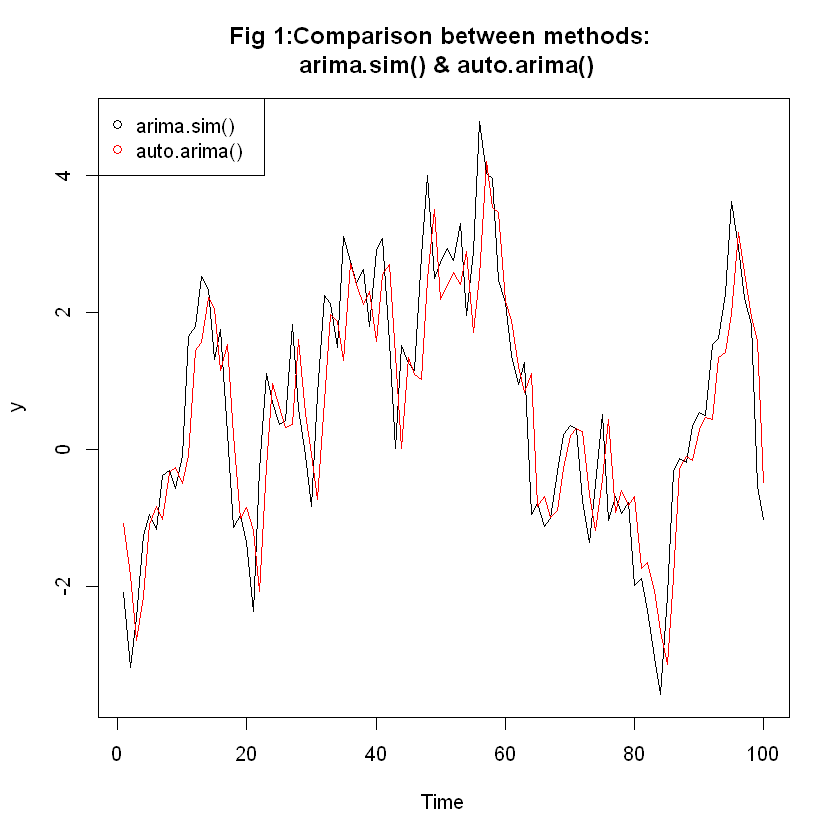

In [ ]:
arm=auto.arima(y)
arm
plot(y, main='Fig 1:Comparison between methods: \n arima.sim() & auto.arima()')
lines(fitted(arm), col='red')
legend('topleft', 
  legend = c('arima.sim()', 'auto.arima()'), 
  col = c('black', 'red'), 
  pch = 1, 
  pt.cex = 1, 
  horiz = F)



<div class=text-justify> 
Como se puede observar en la gráfica en donde se compara el modelo simulado y su estimación con la función auto.arima(), el modelo estimado coincide con el parámetro introducido $(AR=1)$, ya que el resultado de esta estimación fue un modelo $ARIMA(1,0,0)$.
El modelamiento para la simulación asume algunas mediciones de una variable para un periodo determinado. $AR$ es una clase de modelo lineal donde la variable de interés se retrocede en sus propios valores rezagados, se escribe como:


<center>$y_t = \delta + \phi_1y_{t-1} + \phi_2y_{t_2} + ... + \phi_py_{t-p} + \epsilon_t$ 




### Simulacion y analisis para el caso de estudio

<div class=text-justify> 
Con la creación de un repositorio en GitHub, se pudo importar el DataFrame en donde se encuentran los resultados obtenidos del consumo doméstico de electricidad que fueron extraídos del gobierno australiano, luego paso por una limpieza y selección de una porción de los datos con Python. Este DataFrame cuenta con 3 columnas que son la fecha registrada (OUTPUT_DATE), el tipo (TYPE), y el total de consumo en el día (Total). La base de datos está disponible y abierta para cualquiera que desee descargarla, en total esta base de datos tiene información diaria desde el 2011, sin embargo, esta base de datos contiene algunos errores y en especial valores nulos que pueden afectar al momento de asumir algún modelo $ARIMA$; por motivos de legibilidad de los gráficos, se decidido solo tomar una porción del total de los datos (año 2013-2014). Este consumo eléctrico es el medido de tipo domestico en las zonas urbanas en el que se considera el uso de todo tipo de electrodoméstico y otros artefactos en Watts por hora. La simulación fue construida usando la información diaria acumulada en un año. 
Dentro del orden del desarrollo del algoritmo para obtener los resultados, se necesitó convertir la columna que contiene las fechas (OUTPUT_DATE) a un tipo 'date', ya que se volvía ilegible al momento de analizar la gráfica.
    
La primera apreciación que podemos obtener de la gráfica del consumo doméstico de electricidad es que se podría decir que no existe tendencia y que se encuentra estacionaria esta serie de tiempo, asumiendo como primer valor igual a 0 para el parámetro $d$ (fig 2). Aun así en la figura 3 se puede apreciar que solo basto con una sola diferencia para obtener una seria estacionaria, lo que nos quedaría en esta primera apreciación un modelo $ARIMA(p,0,q)$.


Parsed with column specification:
cols(
  OUTPUT_DATE = col_character(),
  TYPE = col_character(),
  Total = col_double()
)


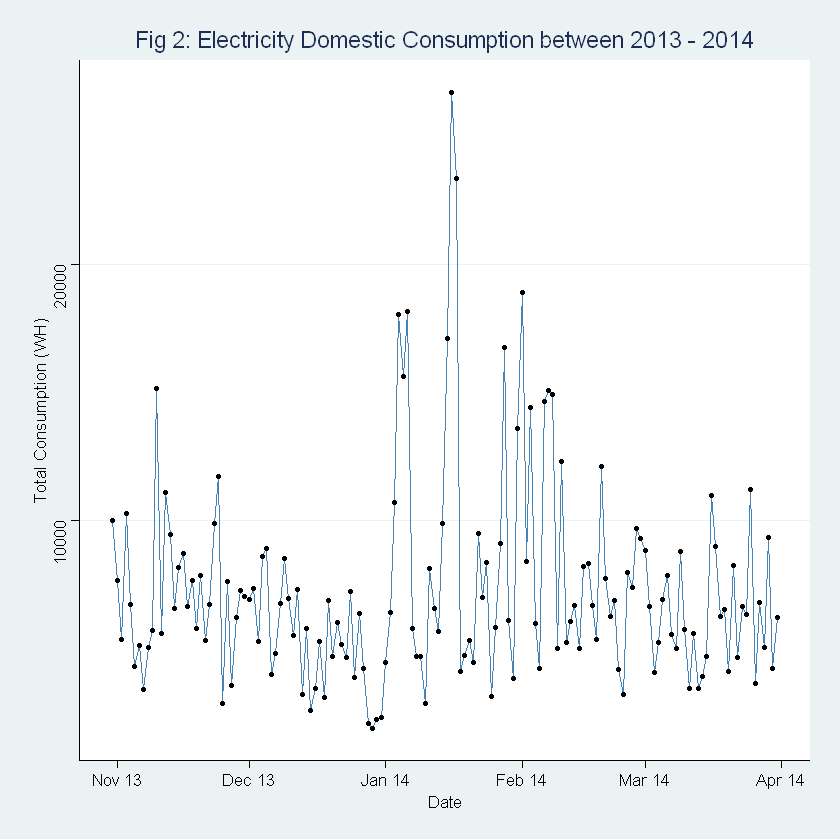

In [ ]:
ConsumptionClear <- read_csv("https://raw.githubusercontent.com/jcastanonv/Statistical-Thinking-UCSP/master/ConsumptionClear.csv")
ConsumptionClear$OUTPUT_DATE <- anydate(ConsumptionClear$OUTPUT_DATE)
f <- ggplot(ConsumptionClear, aes(OUTPUT_DATE, Total)) + geom_line(color='steelblue') + geom_point(na.rm=FALSE, size= 1) + ggtitle('Fig 2: Electricity Domestic Consumption between 2013 - 2014') + xlab('Date') + ylab('Total Consumption (WH)') 
fb <- f + (scale_x_date(labels=date_format("%b %y")))
fb <- fb + theme_stata() 
fb

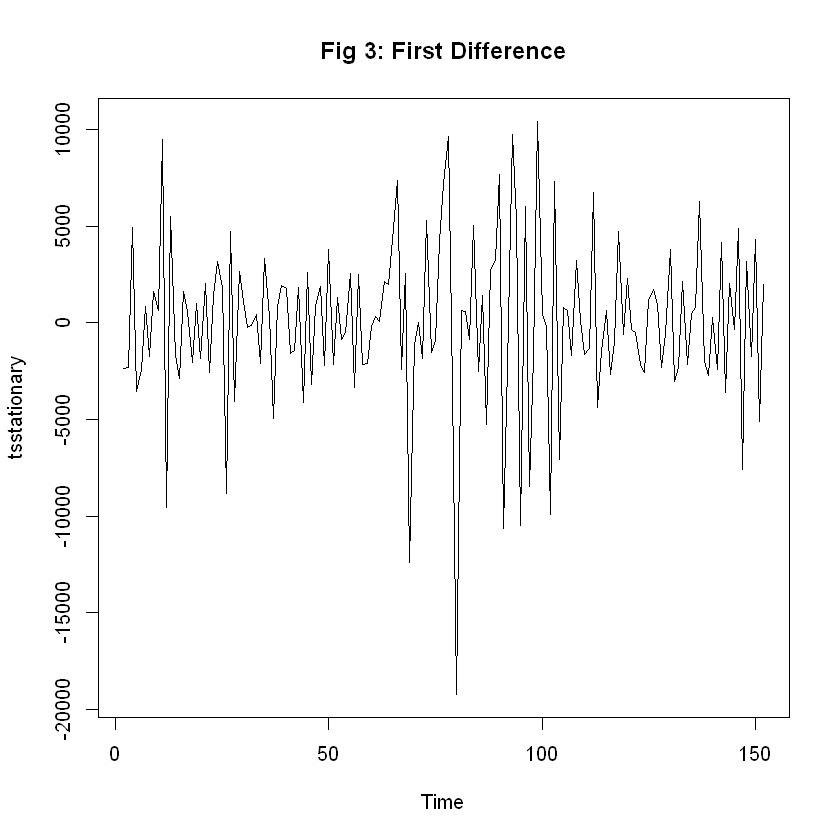

In [ ]:
tsstationary<- diff(serieA, differences = 1)
plot(tsstationary, main='Fig 3: First Difference')

<div class=text-justify> 
Se realizaron las gráficas de autocorrelación ($ACF$) y autocorrelación parcial ($PACF$), estas dos herramientas graficas ayudaran a poder estimar los parámetros del modelo $ARIMA$, específicamente los otros dos parámetros $p$ y $q$, cabe destacar que esta ayuda visual puede generar error al momento de decidir qué modelo es el indicado para simular y predecir los resultados. Se utilizó la gráfica $PACF$ para estimar $p$; ya que en la gráfica el $PACF$ corto después del lag 1 podríamos decir que se trata de un modelo con valor $p$ igual a 1. 

La grafica $ACF$ se utilizó para estimar $q$; ya que esta corta después del lag 2 se podría estimar que estamos frente un modelo cuyo valor $q$ es igual 2. Esto resulta que podríamos simular un modelo $ARIMA (1,0,2)$ para los datos reales de consumo eléctrico. El estadístico que ayudara para tomar la decisión al momento de elegir un modelo será el estadístico de Akaike ($AIC$), que para esta primer modelamiento fue de $2930.42$.


Title:
 KPSS Unit Root Test

Test Results:
  NA

Description:
 Fri Aug 21 17:15:03 2020 by user: joaqu


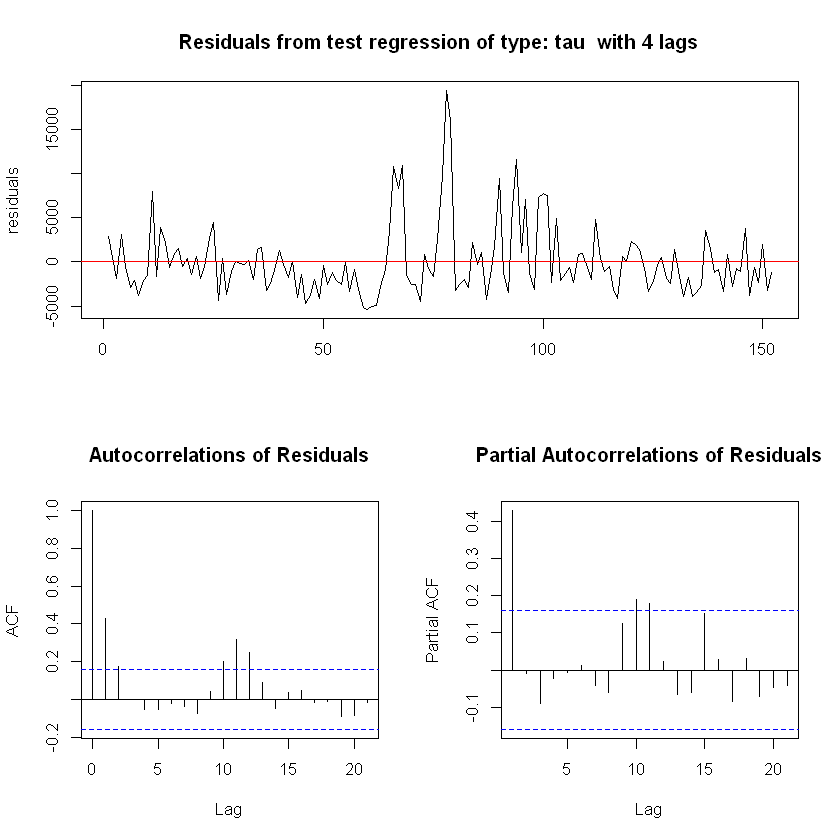

In [ ]:
#Figura 4
serieA= ts(ConsumptionClear$Total)
urkpssTest(serieA, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)



Call:
arima(x = serieA, order = c(1, 0, 2))

Coefficients:
         ar1     ma1    ma2  intercept
      0.1640  0.2651  0.148  7301.3818
s.e.  0.3272  0.3235  0.138   490.8743

sigma^2 estimated as 12915826:  log likelihood = -1460.21,  aic = 2930.42

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -9.678784 3593.859 2653.407 -22.31876 43.49088 0.8564189
                    ACF1
Training set 0.001961414


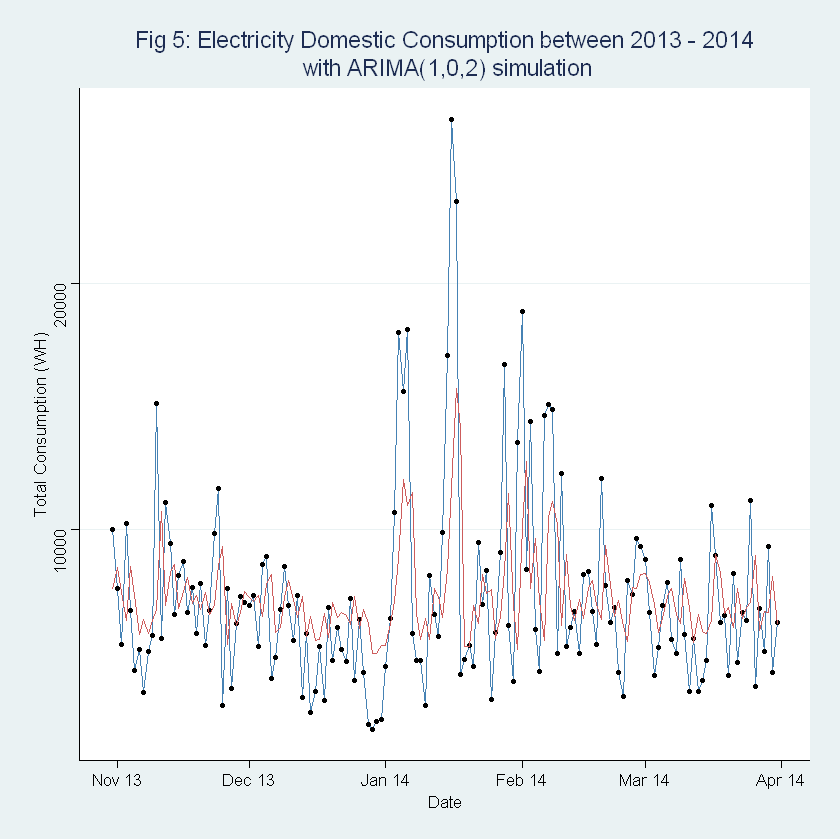

In [ ]:
p1= arima(serieA, c(1,0,2))
summary (p1)

g <- ggplot(ConsumptionClear, aes(OUTPUT_DATE, Total)) + geom_line(color='steelblue') + geom_point(na.rm=FALSE, size= 1) + ggtitle('Fig 5: Electricity Domestic Consumption between 2013 - 2014\n with ARIMA(1,0,2) simulation') + xlab('Date') + ylab('Total Consumption (WH)') 
gb <- g + (scale_x_date(labels=date_format("%b %y")))
gb <- gb + theme_stata() 
gc <- gb + geom_line(aes(y= fitted(p1)), col='indianred')
gc


<div class=text-justify> 
La función auto.arima de la librería forecast de R, proporciona una opción rápida para construir modelos de series de tiempo, ya que esta función evalúa todas las combinaciones posibles para los parámetros $(p,q,d)$, escogiendo al mejor. Para esta prueba se comparara la estimación realizada anteriormente para la figura 5 y esta nueva con realizada con la función auto.arima, usando como criterio el valor $AIC$ de ambos modelos.

In [ ]:
t1= auto.arima(serieA, trace=TRUE, stepwise = TRUE)
summary(t1)





 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 2933.693
 ARIMA(0,0,0) with non-zero mean : 2956.243
 ARIMA(1,0,0) with non-zero mean : 2927.87
 ARIMA(0,0,1) with non-zero mean : 2932.834
 ARIMA(0,0,0) with zero mean     : 3177.21
 ARIMA(2,0,0) with non-zero mean : 2930.93
 ARIMA(1,0,1) with non-zero mean : 2929.97
 ARIMA(2,0,1) with non-zero mean : Inf
 ARIMA(1,0,0) with zero mean     : 2966.187

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,0) with non-zero mean : 2927.533

 Best model: ARIMA(1,0,0) with non-zero mean 

Series: serieA 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1       mean
      0.4274  7301.0806
s.e.  0.0730   508.2506

sigma^2 estimated as 13171721:  log likelihood=-1460.69
AIC=2927.37   AICc=2927.53   BIC=2936.44

Training set error measures:
                    ME     RMSE     MAE       MPE     MAPE      MASE
Training set -9.284956 3605.331 2665.16 -22.35498 43.62673 0.8602

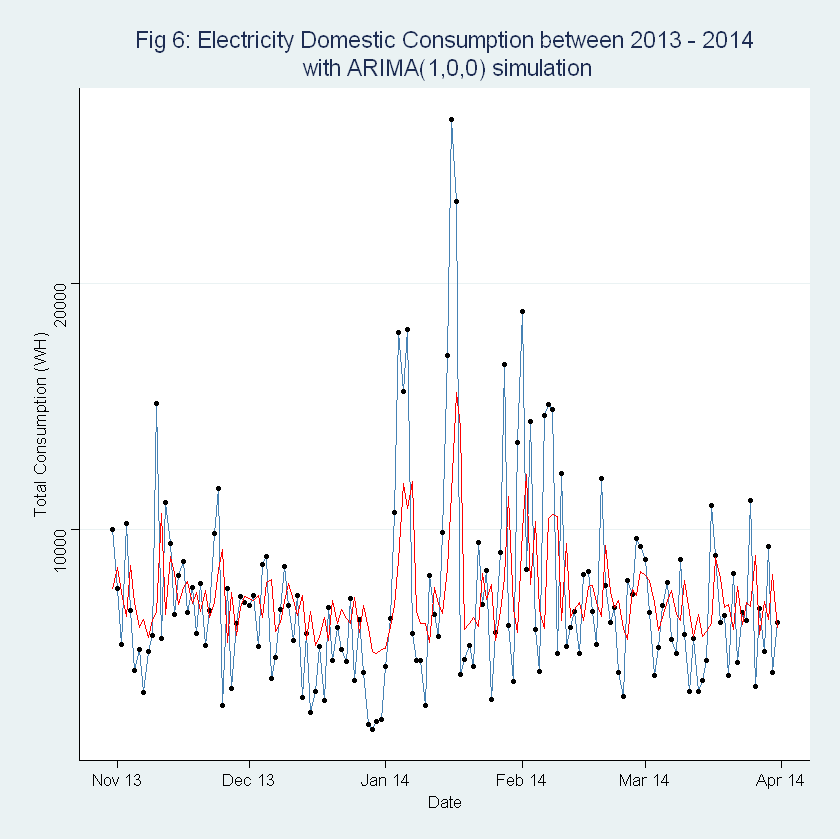

In [ ]:

ConsumptionClear$OUTPUT_DATE <- anydate(ConsumptionClear$OUTPUT_DATE)
f <- ggplot(ConsumptionClear, aes(OUTPUT_DATE, Total)) + geom_line(color='steelblue') + geom_point(na.rm=FALSE, size= 1) + ggtitle('Fig 6: Electricity Domestic Consumption between 2013 - 2014\n with ARIMA(1,0,0) simulation') + xlab('Date') + ylab('Total Consumption (WH)') 
fb <- f + (scale_x_date(labels=date_format("%b %y")))
fb <- fb + theme_stata() 
fc <- fb + geom_line(aes(y= fitted(t1)), col='red')
fc


<div class=text-justify> 
El modelo que sugiere el auto.arima es un modelo $ARIMA(1,0,0)$ con un valor de $AIC$ igual a $2927$ siendo este no muy menor al valor de $AIC$ del modelo que se estimó en primer lugar ($ARIMA(1,0,2)$, $AIC=2930$); eso también se puede apreciar en las gráficas ya que no se observar diferencia significativa entre la fig 5 y la fig 6. Con cualquiera de los dos modelos sugeridos se pueden realizar las simulaciones del consumo doméstico de electricidad y generar predicciones mediante la función forecast() como se muestra, sin embargo el alcance de este trabajo de investigación se basa en lograr obtener un modelo $ARIMA$ que pueda simular los datos reales medidos.

In [ ]:
fore <- forecast(t1)
fore

    Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
153       6834.716 2183.598 11485.83 -278.5547 13947.99
154       7101.741 2043.558 12159.92 -634.0820 14837.56
155       7215.876 2086.812 12344.94 -628.3504 15060.10
156       7264.661 2122.753 12406.57 -599.2090 15128.53
157       7285.514 2141.262 12429.77 -581.9402 15152.97
158       7294.427 2149.747 12439.11 -573.6817 15162.54
159       7298.237 2153.479 12442.99 -569.9916 15166.46
160       7299.865 2155.093 12444.64 -568.3850 15168.11
161       7300.561 2155.786 12445.34 -567.6930 15168.81
162       7300.859 2156.083 12445.63 -567.3962 15169.11

<!-- ## Conclusiones -->

## Conclusiones

<div class=text-justify> 
A pesar de que la base de datos fuese diferente con los datos reportados por el artículo en el que se basa este trabajo de investigación, se puede apreciar que el resultado es replicable, ya que se logró obtener un modelo que puede ayudar a realizar simulaciones de fenómenos directamente relacionados y por ende se podría realizar predicciones del comportamiento de la variable estudiada.
    
Es muy importante resaltar la importancia de la función auto.arima() ya que esta función puede facilitar por mucho la tarea de análisis y además crear un punto de partida para la estimación de los parámetros de los modelos de $ARIMA()$, ya que todo este proceso en cuestiones aplicativas tomaran un tiempo que representa un costo en cualquier compañía y esto se puede ahorrar con esta función.